# Alex Jupyter notebook Tensorflow

    A Jupyter learning notes for tensorflow 
    June ,2017
    Alex Feng
    alfeng@cisco.com
    
    Jupyter_path = /Users/AlexFeng/Library/Python/2.7/bin/jupyter notebook
    
[Tensorflow official web](http://www.tensorflow.org)
    
For Github , please refer [Alex Github Tensorflow link][rf1]
    
   [rf1]:<https://github.com/AlexFengCisco/Tensorflow/blob/master/Jupyter_note/Tensorflow_note.ipynb>

### Import modules

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import animation
from numpy.random import RandomState

### Linear matplot

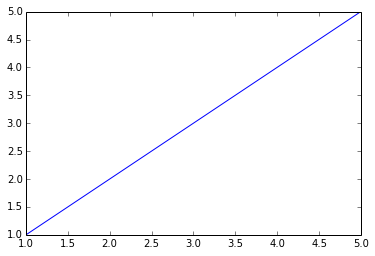

In [14]:
plt.plot([1,2,3,4,5],[1,2,3,4,5])

### Add picture link in Jupyter notebook page

In [65]:
from IPython.display import Image
from IPython.core.display import HTML

Image(url="https://lh3.googleusercontent.com/hIViPosdbSGUpLmPnP2WqL9EmvoVOXW7dy6nztmY5NZ9_u5lumMz4sQjjsBZ2QxjyZZCIPgucD2rhdL5uR7K0vLi09CEJYY=s688")

### Add local picture with markdown

![title](sin.png)

### Tensorflow get_default_graph()

In [8]:
a = tf.constant([1.0,2.0],name='a')
b = tf.constant([2.0,3.0],name='b')
print(tf.get_default_graph())
print(a.graph is tf.get_default_graph())

print a

True
Tensor("a_1:0", shape=(2,), dtype=float32)


### Matplot nonlinear 

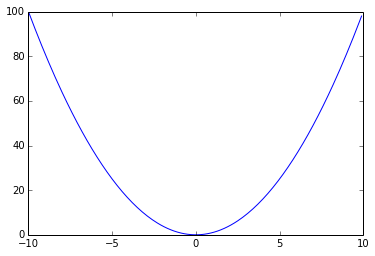

In [5]:
i=0
ii=-10
x =[]
y =[]
for i in range(200):
    x.append(ii)
    y.append(ii*ii)
    ii=ii+0.1
%matplotlib inline 
# for interactive python mode ,ie ipython in Jupyter notebook
plt.plot(x,y)  

### Tensorflow avtivation function matplot

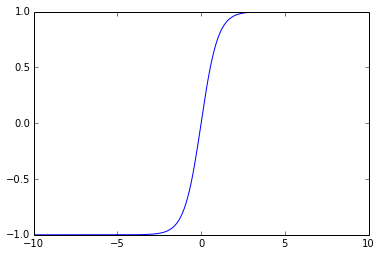

In [7]:
X=tf.constant(x,dtype=tf.float32)
sess=tf.Session()
Y=sess.run(tf.tanh(X)) 
# activation function  tf.nn.relu()  tf.sigmoid()  tf.tanh()

%matplotlib inline
plt.plot(x,Y) 

### Tensorflow queue


>create a queue , init FIFO queue with digits , and first out the queue , plus the digit and push into the queue tail , then do it twice ...


In [10]:
q = tf.FIFOQueue(3,"float")
init = q.enqueue_many(([0.1,0.2,0.3],))
x = q.dequeue()
y = x+1
q_inc = q.enqueue([y])

with tf.Session() as sess:
    sess.run(init)
    quelen = sess.run(q.size())
    for i in range(2):
        sess.run(q_inc)
        
    quelen = sess.run(q.size())
    for i in range(quelen):
        print (sess.run(q.dequeue()))
        

0.3
1.1
1.2


>The follwoing demostrate tf.Variable tf.random_normal with seed

In [13]:
a = tf.random_uniform([1]) # no seed
b = tf.random_normal([1])

print("Session 1")
with tf.Session() as sess1:
  print(sess1.run(a))  # generates 'A1'
  print(sess1.run(a))  # generates 'A2'
  print(sess1.run(b))  # generates 'B1'
  print(sess1.run(b))  # generates 'B2'

print("Session 2")
with tf.Session() as sess2:
  print(sess2.run(a))  # generates 'A3'
  print(sess2.run(a))  # generates 'A4'
  print(sess2.run(b))  # generates 'B3'
  print(sess2.run(b))  # generates 'B4'

Session 1
[ 0.93651235]
[ 0.72354221]
[-0.98065913]
[-1.60730386]
Session 2
[ 0.38616145]
[ 0.09960794]
[-1.09278762]
[-1.12372315]


In [14]:
a = tf.random_uniform([2,3], seed=1)
b = tf.random_normal([1])

# Repeatedly running this block with the same graph will generate the same
# sequence of values for 'a', but different sequences of values for 'b'.
print("Session 1")
with tf.Session() as sess1:
  print(sess1.run(a))  # generates 'A1'
  print(sess1.run(a))  # generates 'A2'
  print(sess1.run(b))  # generates 'B1'
  print(sess1.run(b))  # generates 'B2'

print("Session 2")
with tf.Session() as sess2:
  print(sess2.run(a))  # generates 'A1'
  print(sess2.run(a))  # generates 'A2'
  print(sess2.run(b))  # generates 'B3'
  print(sess2.run(b))  # generates 'B4'

Session 1
[[ 0.23903739  0.92039955  0.05051243]
 [ 0.49574447  0.83552229  0.02647042]]
[[ 0.76375294  0.81383967  0.45532501]
 [ 0.04126346  0.71633077  0.72387242]]
[-1.06889081]
[-1.30729699]
Session 2
[[ 0.23903739  0.92039955  0.05051243]
 [ 0.49574447  0.83552229  0.02647042]]
[[ 0.76375294  0.81383967  0.45532501]
 [ 0.04126346  0.71633077  0.72387242]]
[ 0.45696697]
[ 0.93150395]


>After many many times tunning , adjust training rate and steps ,also try different activate functions , Relu can get 0.3xx cross_entropy loss , sigmoid and tanh can get 0.06x loss, but both tanh and sigmoid met Gradient Vanishing issue , reduce the training rate can solve such kind problems.

>Basicly ,tunning is trying to find a way to balance computing resources and learning acurracy .

In [17]:
BATCH_SIZE = 128
STEPS = 20000

w1=tf.Variable(tf.random_normal([2,3],stddev=1,seed=1))
w2=tf.Variable(tf.random_normal([3,1],stddev=1,seed=1))

x=tf.placeholder(tf.float32, shape=(None,2), name="x-input")
y_=tf.placeholder(tf.float32, shape=(None,1), name="y-input")

#define test data for a trained neural network with trained Weights
test_data=[[0.3,0.1],[0.4,0.1],[0.8,0.6],[0.7,0.8],[0.95,0.13],[0.8,0.165]]


#define neural network forward propagation
a=tf.nn.tanh(tf.matmul(x,w1))
#y=tf.nn.softmax(tf.matmul(a,w2))
y=tf.matmul(a,w2)

#define loss and backward propagation 
#cross_entropy = -tf.reduce_mean(y_*tf.log(tf.clip_by_value(y,1e-10,1.0)))
cross_entropy = tf.reduce_mean(tf.reduce_sum(tf.square(y-y_),reduction_indices=[1]))
#cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_,logits=y)

train_step = tf.train.AdamOptimizer(0.1).minimize(cross_entropy)
#train_step = tf.train.GradientDescentOptimizer(0.003).minimize(cross_entropy)


#generate training sample and lables
rdm=RandomState(1)
dataset_size=1280
X=rdm.rand(dataset_size,2)

Y = [[int(x1+x2<1)] for (x1,x2) in X]


with tf.Session() as sess:
    
    init_op=tf.global_variables_initializer()
    sess.run(init_op)
    print("training  sample X")
    print(X)
    print("training lable Y")
    print(Y)
    print("====BEFORE TRAINING W1 W2")
    print(sess.run(w1))
    print(sess.run(w2))
    
    for i in range(STEPS+1):

        start=(i*BATCH_SIZE)%dataset_size
        end=min(start+BATCH_SIZE,dataset_size)
        
        sess.run(train_step,feed_dict={x:X[start:end],y_:Y[start:end]})
        
        if i % 1000 == 0:
            total_cross_entropy = sess.run(cross_entropy,feed_dict={x:X,y_:Y})
            print("After %d training steps , cross entropy on all data is %g" %(i,total_cross_entropy))
    

    print("===AFTER TRAINING W1 W2")    
    print(sess.run(w1))
    print(sess.run(w2))
    
    
    saver=tf.train.Saver()
    saver.save(sess,"model.ckpt")
    print"====PREDICT"
    
    predict_result = sess.run(y,feed_dict={x:test_data})
    print predict_result
    print type(predict_result)
    
    for result in predict_result:
        print result
        if result[0] > 0.5 :
            print "Qualified!"
        else:
            print "Not Qualified!"
   

training  sample X
[[  4.17022005e-01   7.20324493e-01]
 [  1.14374817e-04   3.02332573e-01]
 [  1.46755891e-01   9.23385948e-02]
 ..., 
 [  3.90439637e-01   2.89011083e-01]
 [  5.13300349e-01   3.48256682e-01]
 [  9.28228018e-01   7.89947796e-01]]
training lable Y
[[0], [1], [1], [1], [1], [0], [0], [1], [1], [1], [0], [0], [0], [1], [0], [1], [0], [0], [0], [1], [0], [0], [1], [0], [1], [1], [1], [1], [1], [0], [1], [0], [1], [0], [0], [0], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [0], [1], [0], [1], [0], [1], [1], [1], [0], [0], [1], [0], [1], [0], [0], [0], [1], [1], [1], [1], [1], [0], [1], [1], [1], [0], [1], [0], [1], [1], [0], [0], [1], [0], [1], [1], [1], [1], [0], [1], [0], [1], [0], [0], [1], [0], [0], [0], [1], [0], [0], [0], [1], [1], [1], [1], [1], [1], [0], [0], [0], [0], [0], [0], [1], [0], [0], [1], [0], [1], [0], [1], [0], [0], [0], [1], [0], [0], [0], [0], [1], [1], [0], [0], [1], [0], [0], [1], [0], [0], [0], [0], [0]

====PREDICT
[[ 1.1482811 ]
 [ 1.16761684]
 [-0.0093751 ]
 [-0.0850091 ]
 [ 0.36367035]
 [ 0.52597952]]
<type 'numpy.ndarray'>
[ 1.1482811]
Qualified!
[ 1.16761684]
Qualified!
[-0.0093751]
Not Qualified!
[-0.0850091]
Not Qualified!
[ 0.36367035]
Not Qualified!
[ 0.52597952]
Qualified!


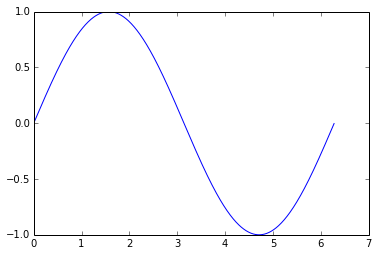

In [7]:
#fig,ax=plt.subpolts()

x = np.arange(0,2*np.pi,0.01)
y = np.sin(x)
%matplotlib inline
plt.plot(x,y)

In [9]:
v=tf.constant([[1.0,2.0,3.0],[4.0,5.0,6.0]])
s=tf.Session()
print s.run(tf.clip_by_value(v,2.5,4.5))
s.close()
# tf.clip_by_value contains data in a dadicated range to avoid math error .

[[ 2.5  2.5  3. ]
 [ 4.   4.5  4.5]]


steps 0 18.800000 learning_rate 0.030000
steps 1 17.672000 learning_rate 0.030000
steps 2 16.611680 learning_rate 0.030000
steps 3 15.614979 learning_rate 0.030000
steps 4 14.678080 learning_rate 0.030000
steps 5 13.797396 learning_rate 0.030000
steps 6 12.969552 learning_rate 0.030000
steps 7 12.191379 learning_rate 0.030000
steps 8 11.459896 learning_rate 0.030000
steps 9 10.772302 learning_rate 0.030000
steps 10 10.125964 learning_rate 0.030000
steps 11 9.518406 learning_rate 0.030000
steps 12 8.947302 learning_rate 0.030000
steps 13 8.410464 learning_rate 0.030000
steps 14 7.905836 learning_rate 0.030000
steps 15 7.431486 learning_rate 0.030000
steps 16 6.985597 learning_rate 0.030000
steps 17 6.566461 learning_rate 0.030000
steps 18 6.172473 learning_rate 0.030000
steps 19 5.802125 learning_rate 0.030000
steps 20 5.453997 learning_rate 0.030000
steps 21 5.126757 learning_rate 0.030000
steps 22 4.819152 learning_rate 0.030000
steps 23 4.530003 learning_rate 0.030000
steps 24 4.2582

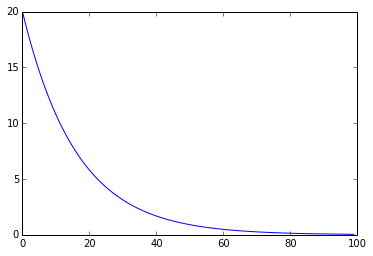

In [118]:
#the following code is a description about Gradient Descent 
#w = 20 is  initial weight
#0.1 is  initial learning rate

w = 20
learning_rate = 0.03
STEPS = 100
#try to tunning init learning rate and steps ,check the matplot graph line

i = 0
y = []
x = []
for i in range(STEPS):
    y.append(w)
    x.append(i)
    w = w-learning_rate*2*w  # 2 means Gradient ,comes from back-propagation method 
    print("steps %d %f learning_rate %f"%(i,w,learning_rate))
    
%matplotlib inline
plt.plot(x,y)


Steps 0 16.000000 decayed_learning_rate 0.100000
Steps 1 12.800000 decayed_learning_rate 0.100000
Steps 2 10.240000 decayed_learning_rate 0.100000
Steps 3 8.192000 decayed_learning_rate 0.100000
Steps 4 6.553600 decayed_learning_rate 0.100000
Steps 5 5.373952 decayed_learning_rate 0.090000
Steps 6 4.406641 decayed_learning_rate 0.090000
Steps 7 3.613445 decayed_learning_rate 0.090000
Steps 8 2.963025 decayed_learning_rate 0.090000
Steps 9 2.429681 decayed_learning_rate 0.090000
Steps 10 2.036072 decayed_learning_rate 0.081000
Steps 11 1.706229 decayed_learning_rate 0.081000
Steps 12 1.429820 decayed_learning_rate 0.081000
Steps 13 1.198189 decayed_learning_rate 0.081000
Steps 14 1.004082 decayed_learning_rate 0.081000
Steps 15 0.857687 decayed_learning_rate 0.072900
Steps 16 0.732636 decayed_learning_rate 0.072900
Steps 17 0.625818 decayed_learning_rate 0.072900
Steps 18 0.534574 decayed_learning_rate 0.072900
Steps 19 0.456633 decayed_learning_rate 0.072900
Steps 20 0.396713 decayed_l

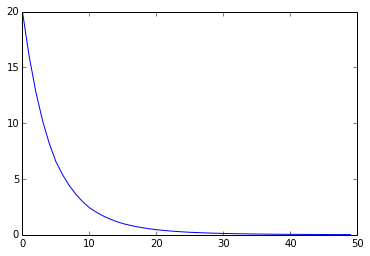

In [119]:
#the following code is a description about Gradient Descent 
#w = 20 is  initial weight
#0.1 is  initial learning rate
#DECAYED LEARNING RATE TO DYNAMIC ADJUST LEARNING RATE AND REDUCE TRAINING EPOCHS

w = 20
learning_rate = 0.1
STEPS = 50
DECAYED_RATE = 0.9
DECAYED_STEPS = 5

#try to tunning init learning rate and steps ,check the matplot graph line

i = 0
y = []
x = []
for i in range(STEPS):
    y.append(w)
    x.append(i)
    decayed_learning_rate = learning_rate * DECAYED_RATE**(i/DECAYED_STEPS)
    w = w-decayed_learning_rate*2*w  # 2 means Gradient ,comes from back-propagation method 
    print("Steps %d %f decayed_learning_rate %f"%(i,w,decayed_learning_rate))
    
%matplotlib inline
plt.plot(x,y)

In [52]:
#tf.argmax find the max number position in the array lines 
# and how to check the training accuracy
pred = np.array([[31, 23,  4, 24, 27, 34],
                [18,  3, 25,  0,  6, 35],
                [28, 14, 33, 22, 20,  8],
                [13, 30, 21, 19,  7,  9],
                [16,  1, 26, 32,  2, 29],
                [17, 12,  5, 11, 10, 15]])
y = np.array([[31, 23,  4, 24, 27, 34],
                [18,  3, 25,  0,  6, 35],
                [28, 14, 33, 22, 20,  8],
                [13, 30, 21, 19,  7,  9],
                [16,  1, 26, 32,  2, 33],
                [17, 12,  5, 11, 10, 15]])

with tf.Session() as sess:
    print(sess.run(tf.argmax(pred,1)))
    print(sess.run(tf.argmax(y,1)))
    
    correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(pred,1))
    print(correct_prediction) # dtype = bool
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    print(sess.run(tf.cast(correct_prediction,tf.float32)))
   
    print(sess.run(accuracy))

[5 5 2 1 3 0]
[5 5 2 1 5 0]
Tensor("Equal_10:0", shape=(6,), dtype=bool)
[ 1.  1.  1.  1.  0.  1.]
0.833333


In [88]:
#test tf.nn.softmax ,sfotmax means the probabbilities in the line ,ust the math fucntion softmax()
# e = 2.71828

x = tf.constant([[1 , 3],
 [  1,  2],
 [ 0.1 ,  0.9]])

#for softmax([1,3]) = [ (e**1/(e**1+e**3)) , (e**3/(e**1+e**3))] = [0.11920... , 0.88079...]
y = tf.constant([[2,4],
                 [1,1],
                  [0.2,1.1]])

y_ = tf.constant([[1,1],
                 [1,1],
                 [0.1,0.2]])

with tf.Session() as sess:
    print(sess.run(tf.nn.softmax(x)))
    print(sess.run(tf.nn.softmax_cross_entropy_with_logits(logits=y,labels=y_)))

[[ 0.11920291  0.88079703]
 [ 0.26894143  0.7310586 ]
 [ 0.31002551  0.68997443]]
[ 2.25385618  1.38629436  0.19234619]


In [67]:
#softmax function as the following
Image(url="https://wikimedia.org/api/rest_v1/media/math/render/svg/e348290cf48ddbb6e9a6ef4e39363568b67c09d3")

In [83]:
#init all random weights with shape 
# useful for a multi hidden layers neural network weights initialize

def init_weights(shape):
    return tf.Variable(tf.random_normal(shape,stddev=0.01))

w = init_weights([3,3,1])
w1 = init_weights([3,3,1,2])

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print(sess.run(w))
    print(sess.run(w1))


[[[  1.90944988e-02]
  [  1.20956451e-03]
  [  1.51437800e-03]]

 [[  1.93372853e-02]
  [  4.18227958e-03]
  [  2.23891679e-02]]

 [[ -8.89478106e-05]
  [  4.23465669e-03]
  [ -2.69078556e-03]]]
[[[[ 0.00910343 -0.01033716]]

  [[-0.01552507  0.00106977]]

  [[ 0.00430991  0.00050735]]]


 [[[-0.022483    0.00634809]]

  [[ 0.00177613 -0.00894006]]

  [[-0.0017625  -0.00054331]]]


 [[[-0.01409278  0.00436285]]

  [[ 0.01244848 -0.0026869 ]]

  [[-0.00201324 -0.00658789]]]]


#### ExponentialMovingAverage 
> decay_rate = min { init_decay ,(1+num_updates)/(10+num_updates)}  init_decay is the first decay_rate ,num_updates means steps

>new_shadow_variable = decay_rate * old_shadow_variable + (1-decay_rate) * real_variable )

> Actually , moving average is use to compute a moving avergage in a list .

In [141]:
v1 = tf.Variable(0, dtype=tf.float32)  
v2 = tf.Variable(0, dtype=tf.float32) 

step = tf.Variable(0, trainable=False)

ema = tf.train.ExponentialMovingAverage(0.99,step)  
averages_op = ema.apply([v1,v2])  
  
with tf.Session() as sess:  
    init_op = tf.global_variables_initializer()  
    sess.run(init_op)  
    print sess.run([v1,ema.average(v1),v2,ema.average(v2)])  
  
    sess.run(tf.assign(v1,2))  
    sess.run(tf.assign(v2,3))  
    sess.run(averages_op)
    
    # decay_rate = min{0.99,(1+step)/(10+Step)} = min{0.99,(1+0/10+0)=0.1}=0.1
    # average = shadow_variable = decay_rate * shadow_variable +(1-decay_rate)*variable = 0.1*0+(1-0.1)*2 =1.8
    print sess.run([v1,ema.average(v1),v2,ema.average(v2)])
    
    sess.run(tf.assign(v1,4))  
    sess.run(tf.assign(v2,5))  
    sess.run(averages_op)
    #v1 = 0.1*1.8+(1-0.1)*4 = 0.18+3.6 =3.78 
    print sess.run([v1,ema.average(v1),v2,ema.average(v2)])
    
    sess.run(tf.assign(step,10))
    sess.run(tf.assign(v1,6))  
    sess.run(tf.assign(v2,7))  
    sess.run(averages_op)
    #decay_rate = min{0.99 , (1+10)/(10+10)} = min {0.99, 11/20=0.55} =0.55
    #v1 = 0.55*3.78+(1-0.55)*6 = 2.079 + 2.7 = 4.779 
    print sess.run([v1,ema.average(v1),v2,ema.average(v2)])

[0.0, 0.0, 0.0, 0.0]
[2.0, 1.8, 3.0, 2.6999998]
[4.0, 3.78, 5.0, 4.77]
[6.0, 4.7789998, 7.0, 5.7735]


### Autoencoder Neural network
> focus on non supervisor learnig , basicly ,compress input samples and decompress output ,compare the ou[ut and input and use back prpopagation to reduce the loss , finally formed neural network weights